In [1]:
#Time series example with Tensorflow 2.0 and RNN-LSTM

In [2]:
"""
import library
"""
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


E:\Continuum\anaconda3\envs\tf2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
tf.__version__

'2.0.0-alpha0'

In [4]:

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('AirPassengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:

#Split data into train and test in the ration of 80/20
 
 
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("train_data_size: "+str(len(train)), " test_data_size: "+str(len(test)))


train_data_size: 112  test_data_size: 29


In [7]:
# convert array to matrix
def create_dataset(dataset, steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-steps-1):
        a = dataset[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + steps, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
steps = 1
trainX, trainY = create_dataset(train, steps)
testX, testY = create_dataset(test, steps)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

""" The network has a visible layer with 1 input, a hidden layer with
4 LSTM blocks or neurons and an output layer that makes a single value
prediction. The default sigmoid activation function is used for the
LSTM blocks. The network is trained for 100 epochs and a batch size of
1 is used."""

# create and fit the LSTM network


In [9]:
layers = [
    tf.keras.layers.LSTM(4, input_shape=(1,1),return_sequences=True),
    tf.keras.layers.Dense(units=1)
]

In [10]:
model = tf.keras.Sequential(layers)

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [13]:
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

W0413 07:11:30.824191 23468 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
110/110 - 1s - loss: 0.1011
Epoch 2/100
110/110 - 1s - loss: 0.0519
Epoch 3/100
110/110 - 0s - loss: 0.0361
Epoch 4/100
110/110 - 0s - loss: 0.0310
Epoch 5/100
110/110 - 0s - loss: 0.0286
Epoch 6/100
110/110 - 0s - loss: 0.0268
Epoch 7/100
110/110 - 0s - loss: 0.0250
Epoch 8/100
110/110 - 0s - loss: 0.0236
Epoch 9/100
110/110 - 0s - loss: 0.0218
Epoch 10/100
110/110 - 0s - loss: 0.0201
Epoch 11/100
110/110 - 0s - loss: 0.0187
Epoch 12/100
110/110 - 0s - loss: 0.0171
Epoch 13/100
110/110 - 0s - loss: 0.0156
Epoch 14/100
110/110 - 0s - loss: 0.0141
Epoch 15/100
110/110 - 1s - loss: 0.0128
Epoch 16/100
110/110 - 1s - loss: 0.0115
Epoch 17/100
110/110 - 0s - loss: 0.0102
Epoch 18/100
110/110 - 0s - loss: 0.0090
Epoch 19/100
110/110 - 0s - loss: 0.0079
Epoch 20/100
110/110 - 0s - loss: 0.0069
Epoch 21/100
110/110 - 0s - loss: 0.0060
Epoch 22/100
110/110 - 0s - loss: 0.0052
Epoch 23/100
110/110 - 0s - loss: 0.0046
Epoch 24/100
110/110 - 0s - loss: 0.0041
Epoch 25/100
110/110 - 0s

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(tf.reshape(trainPredict,[110,1]))
trainY = scaler.inverse_transform(tf.reshape(trainY,[110,1]))
testPredict = scaler.inverse_transform(tf.reshape(testPredict,[27,1]))
testY = scaler.inverse_transform(tf.reshape(testY,[27,1]))

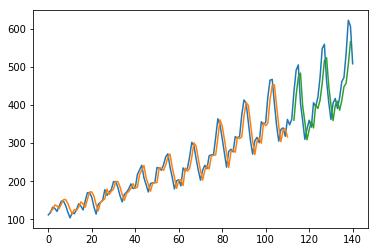

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[steps:len(trainPredict)+steps, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(steps*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()